import all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Read the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
data=pd.read_csv("/content/ahmedabad.csv")
data.head()

Saving ahmedabad.csv to ahmedabad (3).csv


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,1/1/2015,27,15,0,10.8,6,72,3:07 PM,3:36 AM,7:21 AM,6:05 PM,12,20,20,20,33,11,61,0.4,1011,27,10,62,20,ahmedabad
1,1/2/2015,25,14,0,10.9,6,80,3:55 PM,4:31 AM,7:21 AM,6:06 PM,12,19,20,19,26,6,65,0.0,1014,25,10,70,16,ahmedabad
2,1/3/2015,26,15,0,10.9,6,87,4:45 PM,5:26 AM,7:21 AM,6:07 PM,13,21,21,21,14,1,60,0.0,1015,26,10,90,9,ahmedabad
3,1/4/2015,27,16,0,10.9,6,94,5:37 PM,6:17 AM,7:22 AM,6:07 PM,9,21,21,22,22,0,46,0.0,1017,27,10,68,13,ahmedabad
4,1/5/2015,27,14,0,10.9,6,100,6:28 PM,7:07 AM,7:22 AM,6:08 PM,5,20,20,20,24,0,40,0.0,1017,27,10,65,14,ahmedabad


**Set the position of target feature**

In [ ]:
t1 = data['precipMM']
data.drop(labels=['precipMM'], axis=1, inplace = True)
data.insert(1, 'precipMM', t1)
data

,date_time,precipMM,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,1/1/2015,0.4,27,15,0,10.8,6,72,3:07 PM,3:36 AM,7:21 AM,6:05 PM,12,20,20,20,33,11,61,1011,27,10,62,20,ahmedabad
1,1/2/2015,0.0,25,14,0,10.9,6,80,3:55 PM,4:31 AM,7:21 AM,6:06 PM,12,19,20,19,26,6,65,1014,25,10,70,16,ahmedabad
2,1/3/2015,0.0,26,15,0,10.9,6,87,4:45 PM,5:26 AM,7:21 AM,6:07 PM,13,21,21,21,14,1,60,1015,26,10,90,9,ahmedabad
3,1/4/2015,0.0,27,16,0,10.9,6,94,5:37 PM,6:17 AM,7:22 AM,6:07 PM,9,21,21,22,22,0,46,1017,27,10,68,13,ahmedabad
4,1/5/2015,0.0,27,14,0,10.9,6,100,6:28 PM,7:07 AM,7:22 AM,6:08 PM,5,20,20,20,24,0,40,1017,27,10,65,14,ahmedabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,12/27/2020,0.0,29,21,0,10.8,7,85,3:54 PM,4:40 AM,7:19 AM,6:03 PM,6,25,25,24,17,0,33,1013,29,10,219,11,ahmedabad
2188,12/28/2020,0.0,25,14,0,10.8,6,92,4:37 PM,5:34 AM,7:19 AM,6:03 PM,-9,19,20,19,20,0,15,1015,25,10,100,13,ahmedabad
2189,12/29/2020,0.0,25,12,0,10.8,5,100,5:26 PM,6:29 AM,7:20 AM,6:04 PM,-7,17,18,17,26,0,17,1015,25,10,49,16,ahmedabad
2190,12/30/2020,0.0,25,13,0,10.8,6,100,6:18 PM,7:24 AM,7:20 AM,6:04 PM,-3,18,19,18,27,0,24,1015,25,10,44,17,ahmedabad


**We removed few of the columns which were irrelevant or redundant or the columns which had all null values**

In [ ]:
data.drop(["maxtempC","mintempC","moonrise", "moonset","sunrise","sunset","location","totalSnow_cm","FeelsLikeC"], axis = 1, inplace = True) 
data.drop(["date_time"],axis = 1, inplace = True)
data

,precipMM,sunHour,uvIndex,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,0.4,10.8,6,72,12,20,20,33,11,61,1011,27,10,62,20
1,0.0,10.9,6,80,12,20,19,26,6,65,1014,25,10,70,16
2,0.0,10.9,6,87,13,21,21,14,1,60,1015,26,10,90,9
3,0.0,10.9,6,94,9,21,22,22,0,46,1017,27,10,68,13
4,0.0,10.9,6,100,5,20,20,24,0,40,1017,27,10,65,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,0.0,10.8,7,85,6,25,24,17,0,33,1013,29,10,219,11
2188,0.0,10.8,6,92,-9,20,19,20,0,15,1015,25,10,100,13
2189,0.0,10.8,5,100,-7,18,17,26,0,17,1015,25,10,49,16
2190,0.0,10.8,6,100,-3,19,18,27,0,24,1015,25,10,44,17


# **Feature Selection Process**

**Feature selection using Backward elimination**

In [ ]:
!python -m pip install statsmodels 

(1) Next, we have used Backward Feature Elimination under wrapper methods. Here we have done in such a way that if p-value is greater than 0.05, then those features are removed. Below, we have show the p-values of different features. 
Thus based on this table, we removed visibility and pressure.


In [ ]:
import statsmodels.api as sm
X=data.iloc[:,1:15] ## independent features
y=data.iloc[:,0] ## dependent features

#Backward Elimination
cols = list(X.columns)#select the columns
pmax = 1
while (len(cols)>0):
    p= []  #to store pvalues
    X_1 = X[cols] #assign to different variable
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p) #selct maximum p value
    feature_with_p_max = p.idxmax()  #selct maximum p value feature
    if(pmax>0.05):     #threshold value
        cols.remove(feature_with_p_max) #selct feature based on thresold
    else:
        break
selected_features = cols
print(selected_features)

#removing visibility and pressure
data.drop(["cloudcover","winddirDegree"], axis = 1, inplace = True) 
data

X=data.iloc[:,1:13] ## independent features
y=data.iloc[:,0] ## dependent features
m = len(y)
print(X);
print(y);
print(m);
#Backward elimination


const                2.567574e-24
sunHour              2.589929e-03
uvIndex              7.306771e-03
moon_illumination    1.896110e-02
DewPointC            1.509168e-07
HeatIndexC           1.684691e-02
WindChillC           9.068895e-13
WindGustKmph         2.360157e-61
cloudcover           1.973224e-01
humidity             8.009420e-11
pressure             5.768892e-25
tempC                6.244538e-10
visibility           1.252811e-32
winddirDegree        5.707967e-02
windspeedKmph        1.853379e-49
dtype: float64
['sunHour', 'uvIndex', 'moon_illumination', 'DewPointC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'humidity', 'pressure', 'tempC', 'visibility', 'windspeedKmph']
      sunHour  uvIndex  moon_illumination  ...  tempC  visibility  windspeedKmph
0        10.8        6                 72  ...     27          10             20
1        10.9        6                 80  ...     25          10             16
2        10.9        6                 87  ...     26          10  

(2) Next, we perform Feature selection using correlation matrix. We Performed Pearson correlation and got correlation matrix and then did Visualisation of the correlation matrix using heatmap

In [ ]:
data.corr(method='pearson', min_periods=1)

,precipMM,sunHour,uvIndex,moon_illumination,DewPointC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,visibility,winddirDegree,windspeedKmph
precipMM,1.000000,-0.353721,-0.211822,-0.060097,0.306689,0.068329,-0.068319,0.284735,0.475342,0.431454,-0.339519,-0.183205,-0.391012,0.100542,0.218940
sunHour,-0.353721,1.000000,0.617040,0.022644,-0.168392,0.319409,0.455600,-0.048603,-0.558658,-0.450791,-0.000370,0.588371,0.271800,0.201842,0.046839
uvIndex,-0.211822,0.617040,1.000000,-0.027887,0.015014,0.674672,0.855352,-0.057426,-0.377342,-0.405094,-0.254344,0.913604,0.217870,0.370924,0.085128
moon_illumination,-0.060097,0.022644,-0.027887,1.000000,-0.057662,-0.053917,-0.044224,0.019371,-0.018747,-0.029454,0.045392,-0.041184,0.048083,-0.051986,0.018262
DewPointC,0.306689,-0.168392,0.015014,-0.057662,1.000000,0.645370,0.359472,0.108206,0.724712,0.872743,-0.786953,0.111309,-0.167361,0.411064,0.275669
HeatIndexC,0.068329,0.319409,0.674672,-0.053917,0.645370,1.000000,0.920496,0.057768,0.286351,0.257189,-0.791295,0.789830,0.065154,0.564907,0.276664
WindChillC,-0.068319,0.455600,0.855352,-0.044224,0.359472,0.920496,1.000000,-0.033038,-0.010328,-0.086643,-0.579763,0.934811,0.149175,0.517788,0.166368
WindGustKmph,0.284735,-0.048603,-0.057426,0.019371,0.108206,0.057768,-0.033038,1.000000,0.316199,0.181256,-0.297314,0.006768,0.003196,0.101795,0.946351
cloudcover,0.475342,-0.558658,-0.377342,-0.018747,0.724712,0.286351,-0.010328,0.316199,1.000000,0.842923,-0.658614,-0.243072,-0.262835,0.232120,0.366153
humidity,0.431454,-0.450791,-0.405094,-0.029454,0.872743,0.257189,-0.086643,0.181256,0.842923,1.000000,-0.602771,-0.325452,-0.275089,0.239695,0.249373


                   precipMM   sunHour  ...  winddirDegree  windspeedKmph
precipMM           1.000000 -0.353721  ...       0.100542       0.218940
sunHour           -0.353721  1.000000  ...       0.201842       0.046839
uvIndex           -0.211822  0.617040  ...       0.370924       0.085128
moon_illumination -0.060097  0.022644  ...      -0.051986       0.018262
DewPointC          0.306689 -0.168392  ...       0.411064       0.275669
HeatIndexC         0.068329  0.319409  ...       0.564907       0.276664
WindChillC        -0.068319  0.455600  ...       0.517788       0.166368
WindGustKmph       0.284735 -0.048603  ...       0.101795       0.946351
humidity           0.431454 -0.450791  ...       0.239695       0.249373
pressure          -0.339519 -0.000370  ...      -0.553759      -0.477656
tempC             -0.183205  0.588371  ...       0.446820       0.164301
visibility        -0.391012  0.271800  ...       0.014470       0.056405
winddirDegree      0.100542  0.201842  ...       1.

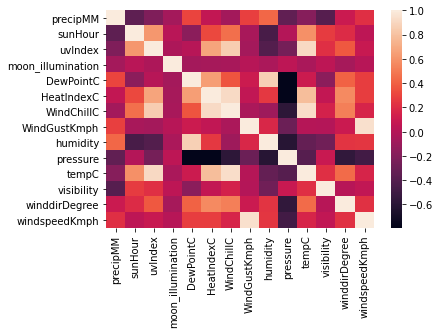

In [ ]:
correlation = data.corr(method='pearson', min_periods=1)
data.corr(method='pearson', min_periods=1)
sns.heatmap(correlation)
print(correlation)
#removing coloumns which are highly correlated
data.drop(["cloudcover"], axis = 1, inplace = True) 
data

X=data.iloc[:,1:14] ## independent features
y=data.iloc[:,0] ## dependent features
m = len(y)
print(X);
print(y);
print(m);
#Correlation

**Split dataset into training and testing dataset to fit the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Apply Multiple Linear regression**

In [ ]:
# Fitting multiple lineaar regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
model=regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = model.predict(X_test)
#print(y_test,y_pred)
r2 = model.score(X_test, y_test)
print(r2)

0.23791636362183177


In [ ]:
print(regressor.coef_)
print(regressor.intercept_)


[ 0.08584264  0.54109646 -0.0011155  -0.06459915  0.25820844  0.62116489
  0.1784463  -0.01724362 -0.02698522 -0.02266274  0.00196584 -0.1650257 ]
3.9617612629547594


     Predicted  Actual
0     9.809264     0.7
1    -1.507272     0.0
2     3.051344     0.0
3     8.056164     6.8
4     2.684958     0.0
..         ...     ...
434   9.363050     0.3
435   3.656400     0.0
436  -3.396495     0.0
437  -1.681678     0.0
438   1.872109     0.0

[439 rows x 2 columns]


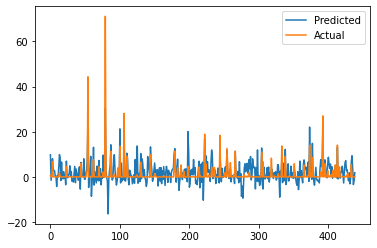

In [ ]:
#Create dataframe for actual and predicted output values.
df = pd.DataFrame(y_pred, columns = ['Predicted']) 
y_test = pd.Series(y_test).array
df['Actual'] = y_test
print(df)
df.plot()

In [ ]:
df.loc[df['Predicted'] < 0, 'Predicted'] = 0 #convert the negative values to zeros
df

,Predicted,Actual
0,9.809264,0.7
1,0.000000,0.0
2,3.051344,0.0
3,8.056164,6.8
4,2.684958,0.0
...,...,...
434,9.363050,0.3
435,3.656400,0.0
436,0.000000,0.0
437,0.000000,0.0


**Apply Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X_train) #transform input features
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train)  #train the model
a=lin2.predict(poly.fit_transform(X_test)) #test the model


0.7303773230784354
     Predicted  Actual
0     3.509938     0.7
1    -0.520515     0.0
2    -1.058213     0.0
3     9.279448     6.8
4     0.452200     0.0
..         ...     ...
434   1.465179     0.3
435   0.952180     0.0
436  -0.262645     0.0
437   0.918967     0.0
438   0.175144     0.0

[439 rows x 2 columns]


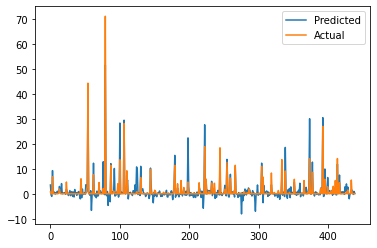

In [ ]:
score=lin2.score(poly.fit_transform(X_test),y_test)
print(score)
#Create dataframe for actual and predicted output values.
df1 = pd.DataFrame(a, columns = ['Predicted'])
y_test = pd.Series(y_test).array 
df1['Actual'] = y_test
print(df1)
df1.plot()

In [ ]:
df1.loc[df1['Predicted'] < 0, 'Predicted'] = 0 #convert the negative values to zeros
df1

,Predicted,Actual
0,3.509938,0.7
1,0.000000,0.0
2,0.000000,0.0
3,9.279448,6.8
4,0.452200,0.0
...,...,...
434,1.465179,0.3
435,0.952180,0.0
436,0.000000,0.0
437,0.918967,0.0


0.7689274102837674


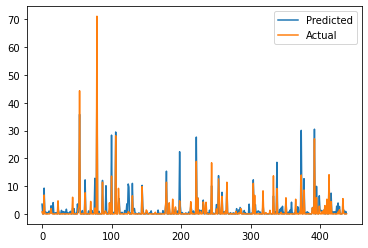

In [ ]:
#find r square measure
def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
print(r2(df1['Predicted'],y_test))
#visualize the result
df1.plot()